<a href="https://colab.research.google.com/github/Bill-Zhan/ML_CodesFromScratch/blob/master/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement Kmeans and Kmeans ++

#1. Kmeans
1. Find random K points as centroids.
2. Compute the distance between data points and these centroids.
3. For each data point, choose the closest one as its centroid.
4. Form k clusters. Update the cluster centroids.

In [30]:
res = np.array([0,1,1,0,1])
arr = np.array([[1,2,3],[4,5,7],[12,5,5],[4,56,8],[3,53,6]])

In [42]:
np.mean(arr[np.where(res == 1)[0],:], axis=0)

array([ 6.33333333, 21.        ,  6.        ])

In [43]:
import numpy as np

class KmeansCluster:
    '''Implement Kmeans algorithm in numpy

    Attributes:
        k: int
            Hyperparameter K, how many clusters to generate.
        data: np.array
            Data in numpy array format.
        n_iter: int
            Number of maximum iteration. If None, will iterate until centroids don't change.
        n: int
            Number of data points.
        m: int
            Number of features.
        centroids: list of np.array
            Centroid of each cluster. Has k elements, each is a 1d array of size m.
        cluster_res: np.array
            Clustering result for each data point. From 0 to k-1.
    '''
    def __init__(self, k, data, n_iter=None):
        self.k = k
        self.data = data
        self.n_iter = n_iter
        self.n, self.m = self.data.shape
        self.centroids = None
        self.cluster_res = np.array([-1 for _ in range(self.n)])
        self.init_centroids()

    def init_centroids(self):
        init_centroid_ids = np.random.choice(self.n, size=self.k, replace=False)
        self.centroids = list(self.data[init_centroid_ids, :])

    def find_cluster(self, dp):
        min_dis = float('inf')
        best_cluster = -1
        for i, c in enumerate(self.centroids):
            dis = np.sum(np.square(c-dp))
            if dis < min_dis:
                min_dis = dis
                best_cluster = i
        return best_cluster
    
    def update_centroids(self):
        new_centroids = []
        for i in range(self.k):
            samples = self.data[np.where(self.cluster_res == i)[0],:]
            new_centroids.append(np.mean(samples, axis=0))
        return new_centroids
    
    def one_iter(self):
        #--- find closest centroid for each data point
        for i in range(self.n):
            dp = self.data[i,:]
            cluster_id = self.find_cluster(dp)
            self.cluster_res[i] = cluster_id
        
        #--- update centroids
        new_centroids = self.update_centroids()
        # print(len(new_centroids))
        return new_centroids
    
    def fit(self):
        if not self.n_iter:  # train until centroids don't change
            old_centroids = []
            while not np.equal(np.array(self.centroids), np.array(old_centroids)):
                old_centroids = self.centroids
                self.centroids = self.one_iter()
        else:
            for _ in range(self.n_iter):
                self.centroids = self.one_iter()
        return (self.centroids, self.cluster_res)

Test:

In [12]:
test_data = np.array([[1.658985,4.285136],
[-3.453687,3.424321],
[4.838138,-1.151539],
[-5.379713,-3.362104],
[0.972564,2.924086],
[-3.567919,1.531611],
[0.450614,-3.302219],
[-3.487105,-1.724432],
[2.668759,1.594842],
[-3.156485,3.191137],
[3.165506,-3.999838],
[-2.786837,-3.099354],
[4.208187,2.984927],
[-2.123337,2.943366],
[0.704199,-0.479481],
[-0.39237,-3.963704],
[2.831667,1.574018],
[-0.790153,3.343144],
[2.943496,-3.357075],
[-3.195883,-2.283926],
[2.336445,2.875106],
[-1.786345,2.554248],
[2.190101,-1.90602],
[-3.403367,-2.778288],
[1.778124,3.880832],
[-1.688346,2.230267],
[2.592976,-2.054368],
[-4.007257,-3.207066],
[2.257734,3.387564],
[-2.679011,0.785119],
[0.939512,-4.023563],
[-3.674424,-2.261084],
[2.046259,2.735279],
[-3.18947,1.780269],
[4.372646,-0.822248],
[-2.579316,-3.497576],
[1.889034,5.1904],
[-0.798747,2.185588],
[2.83652,-2.658556],
[-3.837877,-3.253815],
[2.096701,3.886007],
[-2.709034,2.923887],
[3.367037,-3.184789],
[-2.121479,-4.232586],
[2.329546,3.179764],
[-3.284816,3.273099],
[3.091414,-3.815232],
[-3.762093,-2.432191],
[3.542056,2.778832],
[-1.736822,4.241041],
[2.127073,-2.98368],
[-4.323818,-3.938116],
[3.792121,5.135768],
[-4.786473,3.358547],
[2.624081,-3.260715],
[-4.009299,-2.978115],
[2.493525,1.96371],
[-2.513661,2.642162],
[1.864375,-3.176309],
[-3.171184,-3.572452],
[2.89422,2.489128],
[-2.562539,2.884438],
[3.491078,-3.947487],
[-2.565729,-2.012114],
[3.332948,3.983102],
[-1.616805,3.573188],
[2.280615,-2.559444],
[-2.651229,-3.103198],
[2.321395,3.154987],
[-1.685703,2.939697],
[3.031012,-3.620252],
[-4.599622,-2.185829],
[4.196223,1.126677],
[-2.133863,3.093686],
[4.668892,-2.562705],
[-2.793241,-2.149706],
[2.884105,3.043438],
[-2.967647,2.848696],
[4.479332,-1.764772],
[-4.905566,-2.911070],
])

In [44]:
import matplotlib.pyplot as plt
k = 4
kmeans_cluster = KmeansCluster(k, test_data, n_iter=100)
centroids, clusterAssment = kmeans_cluster.fit()

In [27]:
print(centroids[0].shape)
print('---------------------------------')
print(clusterAssment)

(20, 2)
---------------------------------
[1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1
 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0
 3 2 1 0 3 2]


In [51]:
def showCluster(dataSet, k, centroids, clusterAssment):
	numSamples, dim = dataSet.shape
	if dim != 2:
		print("Sorry! I can not draw because the dimension of your data is not 2!")
		return 1
 
	mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
	if k > len(mark):
		print("Sorry! Your k is too large! please contact Zouxy")
		return 1
 
	# draw all samples
	for i in range(numSamples):
		markIndex = int(clusterAssment[i])
		plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])
 
	mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
	# draw the centroids
	for i in range(k):
		plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 12)
 
	plt.show()

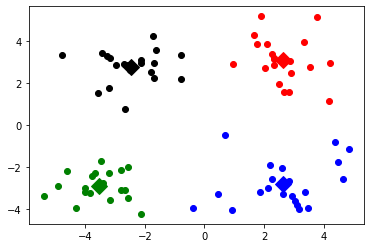

In [53]:
showCluster(np.mat(test_data), k, np.mat(centroids), clusterAssment)